**<font color=blue>Vamos a desarrollar un script para hacer Análisis de Componentes Principales (PCA) sobre los espectros de masas FTICRMS de crudos y fondos de vacío, los datos de masa fueron procesados con el software PetrOrg y extraídos las formulas moleculares para cada tipo de muestras. El número de muestras es de 40, 22 crudos y 18 fondos de vacío.**

In [1]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
Y = pd.DataFrame(['CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR'])
Y1=Y.set_axis(['Crude_Oil'], axis=1, inplace=False)

In [ ]:
data = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/Supplementary_CCR.xlsx?raw=true')#, sheet_name='Sheet1', header=0, index_col=0)
data = data.drop(['Molecules\Samples'], axis=1)
val=data.values
val

In [5]:
NM=len(data.columns) # Número de muestras
#suma = np.empty((NM, 1)) #creamos un vector vacío para luego ir llenandolo con el resultado de la suma de intesidades de cada espectro
#k=0 #inicializamos el contador
#for k in np.arange(NM): #lo ponemos a correr hasta 40, que es el numero de espectros(muestras)
#    suma[k]=sum(val[:, k]) #desarrollamos la suma a lo largo de cada columna, cada muestra
#    k +=1 #variamos el contador en 1

valt=val.T
#valtn=valt/suma

valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("shape of datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:9]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

shape of datos_pca (40, 9)
[0.72166446 0.09206499 0.06920497 0.02493316 0.01663746 0.01623273
 0.00860407 0.00818903 0.00490243]
suma: 0.9624333051483426


In [6]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.020986,0.003528,-0.004358,-0.000829,-0.002441,0.000147,0.000190,0.003038,-0.002066
1,0.018113,0.004578,0.000668,0.001180,-0.001818,-0.000987,-0.000926,0.001590,-0.002703
2,0.032063,-0.004886,-0.005630,-0.002879,-0.002735,0.008669,0.000674,-0.002956,-0.002892
3,0.022539,-0.003314,-0.004269,-0.000819,-0.001135,0.005069,-0.001003,-0.002386,-0.002107
4,0.010698,-0.012285,-0.002548,-0.002649,0.003557,-0.000898,0.003369,0.004300,0.003800


In [7]:
explained_variance = np.insert(expl, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=["Explained Variance"])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance']
) ## making data frames for variances 
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis =1)
df_explained_variance  

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.721664,0.722
2,PC2,0.092065,0.814
3,PC3,0.069205,0.883
4,PC4,0.024933,0.908
5,PC5,0.016637,0.925
6,PC6,0.016233,0.941
7,PC7,0.008604,0.950
8,PC8,0.008189,0.958
9,PC9,0.004902,0.963


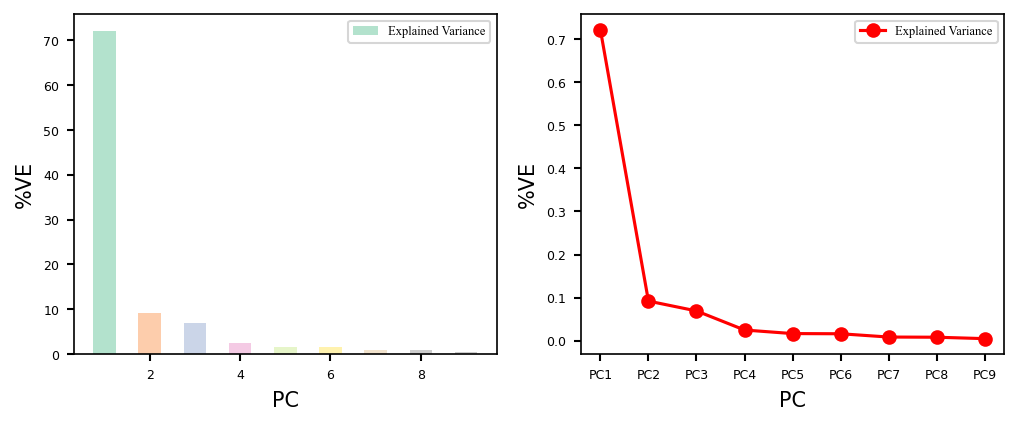

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8, 3), dpi=150, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Pastel2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
anmss=df_explained_variance.drop(0, axis=0)
x = anmss.index
altura = anmss['Explained Variance']
ax[0].bar(x=x, height=altura*100, width=0.5, color=colors, label='Explained Variance')
ax[0].legend(loc='best', fontsize=6)
ax[0].tick_params(labelsize=6, labelcolor='k', width=1)
ax[0].set_xlabel('PC',  fontsize=10)
ax[0].set_ylabel('%VE', fontsize=10)
ax[1].plot(anmss['PC'], anmss['Explained Variance'], 'ro-', label='Explained Variance')
ax[1].tick_params(labelsize=6, labelcolor='k', width=1)
ax[1].set_xlabel('PC',  fontsize=10)
ax[1].set_ylabel('%VE', fontsize=10)
ax[1].legend(loc=0, fontsize=6)

In [9]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
colormap = {'CR': 'red', 'VR': 'green'}
colors = [colormap[x] for x in datos_pca1['Crude_Oil']]
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', plot_width=600, plot_height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)

p.circle(datos_pca1[0], datos_pca1[1], color=colors, line_width=2, legend_label='colormap', 
         size=10, alpha=0.6)
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

In [10]:
from pca import pca
import pandas as pd
import numpy as np

model = pca(alpha=0.05)

out = model.fit_transform(valtn)

ModuleNotFoundError: No module named 'pca'

In [ ]:
model.biplot(legend=True, SPE=True, hotellingt2=True)

In [ ]:
model.plot()

In [ ]:
ax = model.biplot(n_feat=2, legend=False)

In [ ]:
ax = model.biplot3d(n_feat=10, legend=False)

https://github.com/erdogant/pca

In [ ]:
data=preprocessing.scale(valtn)
output=pca.fit_transform(data)

loadings_p = pca.components_.T
eigenvalues = pca.explained_variance_

hotelling_t2s = np.array([xi.dot(loadings_p)
                            .dot(np.diag(eigenvalues ** -1))
                            .dot(loadings_p.T)
                            .dot(xi.T)
                          for xi in data])